Crimen y Pobreza: Exploración de una relación compleja

Equipo 1:

Juan Briganti 21.153.246-7, Joaquin Rivillo 20.162.740-0, Benjamin Salinas 20.878.507-9


#Objetivo del proyecto
El objetivo principal de este proyecto es analizar la relación entre pobreza y criminalidad en las regiones de Chile, explorando cómo distintas variables socioeconómicas y demográficas (como la pobreza multidimensional, la tasa de desocupación, la edad y el sexo de los victimarios) influyen en la incidencia delictiva. Para ello, se emplearon modelos de aprendizaje supervisado como regresión lineal múltiple y Random Forest, buscando no solo cuantificar el impacto de estas variables sobre las tasas de delitos, sino también identificar patrones que permitan orientar políticas públicas más efectivas en materia de prevención del crimen y desarrollo social.


#Metodos utilizados
El proyecto utilizó un enfoque mixto de análisis cuantitativo, combinando modelos estadísticos y técnicas de aprendizaje automático. Inicialmente se aplicó una regresión lineal múltiple para evaluar la relación entre la tasa de delitos y variables explicativas como la pobreza (por ingresos y multidimensional), la tasa de desocupación, el sexo y la edad de los victimarios. Este modelo permitió identificar relaciones lineales entre las variables y evaluar su significancia mediante métricas como el R².

Posteriormente, se implementó un modelo Random Forest, un algoritmo de machine learning no lineal que mejora la capacidad predictiva al capturar interacciones más complejas entre variables. Este modelo mostró un rendimiento superior, con mayor R² y menor error cuadrático medio (RMSE). Además, se utilizó el modelo Lasso para identificar las variables más relevantes, penalizando aquellas con menor contribución predictiva y reforzando así la interpretación del modelo. También se realizó una validación de supuestos en el modelo lineal y un análisis de robustez que consideró cambios metodológicos en la medición de pobreza a lo largo del tiempo


#Conclusiones y recomendaciones
Se concluye que no existe una relación lineal simple entre pobreza e incidencia delictiva, pero sí se identifican factores asociados relevantes, como la tasa de desocupación y ciertos grupos etarios (especialmente jóvenes entre 14 y 29 años). El modelo Random Forest demostró un mejor rendimiento predictivo frente al modelo lineal, revelando patrones más complejos. Se recomienda a los tomadores de decisiones considerar enfoques integrales que incluyan intervenciones dirigidas a jóvenes en riesgo, fortalecimiento de políticas laborales y complementación del análisis con estudios sobre la efectividad de acciones policiales y sociales existentes. Asimismo, futuras investigaciones podrían profundizar en técnicas de segmentación como el clustering para generar perfiles regionales más específicos

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import io

# === Cargar archivo Excel desde el entorno de Google Colab ===
# Esto permite al usuario subir manualmente un archivo desde su equipo
uploaded = files.upload()  # Aparece un selector para elegir archivo
crimen_file = list(uploaded.keys())[0]  # Se toma el nombre del archivo cargado
data = io.BytesIO(uploaded[crimen_file])  # Se convierte el archivo en un flujo de bytes para usar con pandas

# === Mostrar todas las hojas del archivo Excel ===
# Esto permite ver qué hojas (pestañas) contiene el archivo, para decidir cuál cargar
hojas = pd.ExcelFile(data)
print(hojas.sheet_names)

# === Cargar hoja "junto" como DataFrame principal ===
# Esta hoja contiene los indicadores por región y año (desempleo, pobreza, tasa de delitos, etc.)
df_principal = pd.read_excel(data, sheet_name='junto')

# === Cargar hoja "region sexo edad" con los datos de victimarios ===
# Esta hoja tiene información de delitos desagregada por sexo, edad, región y año
df_victimarios = pd.read_excel(data, sheet_name='region sexo edad')

# === Revisar nombres de columnas de ambos DataFrames ===
# Es importante para asegurar que los nombres están correctos antes de hacer análisis o transformaciones
print(df_principal.columns)
print(df_victimarios.columns)


Saving CrimenPobreza.xlsx to CrimenPobreza.xlsx
['4 dimensiones', '5 dimensiones', 'junto', 'region sexo edad']
Index(['año', 'Region', 'Tasa delitos 100.000 habitantes',
       'Tasa de desocupacion %', 'Pobreza multidimensional'],
      dtype='object')
Index([           'Region', 'Tipo Participante',              'Sexo',
                    'Edad',                2011,                2013,
                      2015,                2017,                2020,
                      2022],
      dtype='object')


In [ ]:
# === LIMPIEZA DE NOMBRES DE COLUMNAS ===
# Se eliminan espacios en blanco al inicio o final de los nombres de columnas
# Esto previene errores al acceder por nombre o al hacer merges
df_principal.columns = df_principal.columns.str.strip()
df_victimarios.columns = df_victimarios.columns.str.strip()

# === VERIFICACIÓN DE COLUMNAS ===
# Se imprime la lista de nombres de columnas de ambos DataFrames para verificar que quedaron limpios
print("\nNombres de las columnas de df_principal después de limpiar:")
print(df_principal.columns.tolist())
print("\nNombres de las columnas de df_victimarios después de limpiar:")
print(df_victimarios.columns.tolist())

# === VISTA RÁPIDA DE DATOS ===
# Se imprimen las primeras 5 filas para cada DataFrame, ya con los nombres corregidos
print("\nPrimeras filas de df_principal ya corregidos:")
print(df_principal.head())
print("\nPrimeras filas de df_victimarios ya corregidos:")
print(df_victimarios.head())

# === RESUMEN ESTADÍSTICO ===
# Describe las variables numéricas de cada DataFrame (media, min, max, etc.)
print("\nResumen estadístico de df_principal:")
print(df_principal.describe())
print("\nResumen estadístico de df_victimarios:")
print(df_victimarios.describe())

# === DIMENSIONES DE LOS DATOS ===
# Se muestra cuántas filas y columnas tiene cada DataFrame (filas, columnas)
print(f"\nTamaño de df_principal: {df_principal.shape}")
print(f"\nTamaño de df_victimarios: {df_victimarios.shape}")



Nombres de las columnas de df_principal después de limpiar:
['año', 'Region', 'Tasa delitos 100.000 habitantes', 'Tasa de desocupacion %', 'Pobreza multidimensional']

Nombres de las columnas de df_victimarios después de limpiar:
['Region', 'Tipo Participante', 'Sexo', 'Edad', nan, nan, nan, nan, nan, nan]

Primeras filas de df_principal ya corregidos:
    año                         Region  Tasa delitos 100.000 habitantes  \
0  2011   Región de Arica y Parinacota                           2537.9   
1  2011             Región de Tarapacá                           4367.7   
2  2011          Región de Antofagasta                           4091.0   
3  2011              Región de Atacama                           3187.4   
4  2011             Región de Coquimbo                           2381.5   

   Tasa de desocupacion %  Pobreza multidimensional  
0                8.086914                      27.1  
1                5.539221                      24.2  
2                6.269424      


--- Regresión: 4 dimensiones ---
                            OLS Regression Results                            
Dep. Variable:           tasa_delitos   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     8.092
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           0.000238
Time:                        03:31:37   Log-Likelihood:                -344.72
No. Observations:                  45   AIC:                             697.4
Df Residuals:                      41   BIC:                             704.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

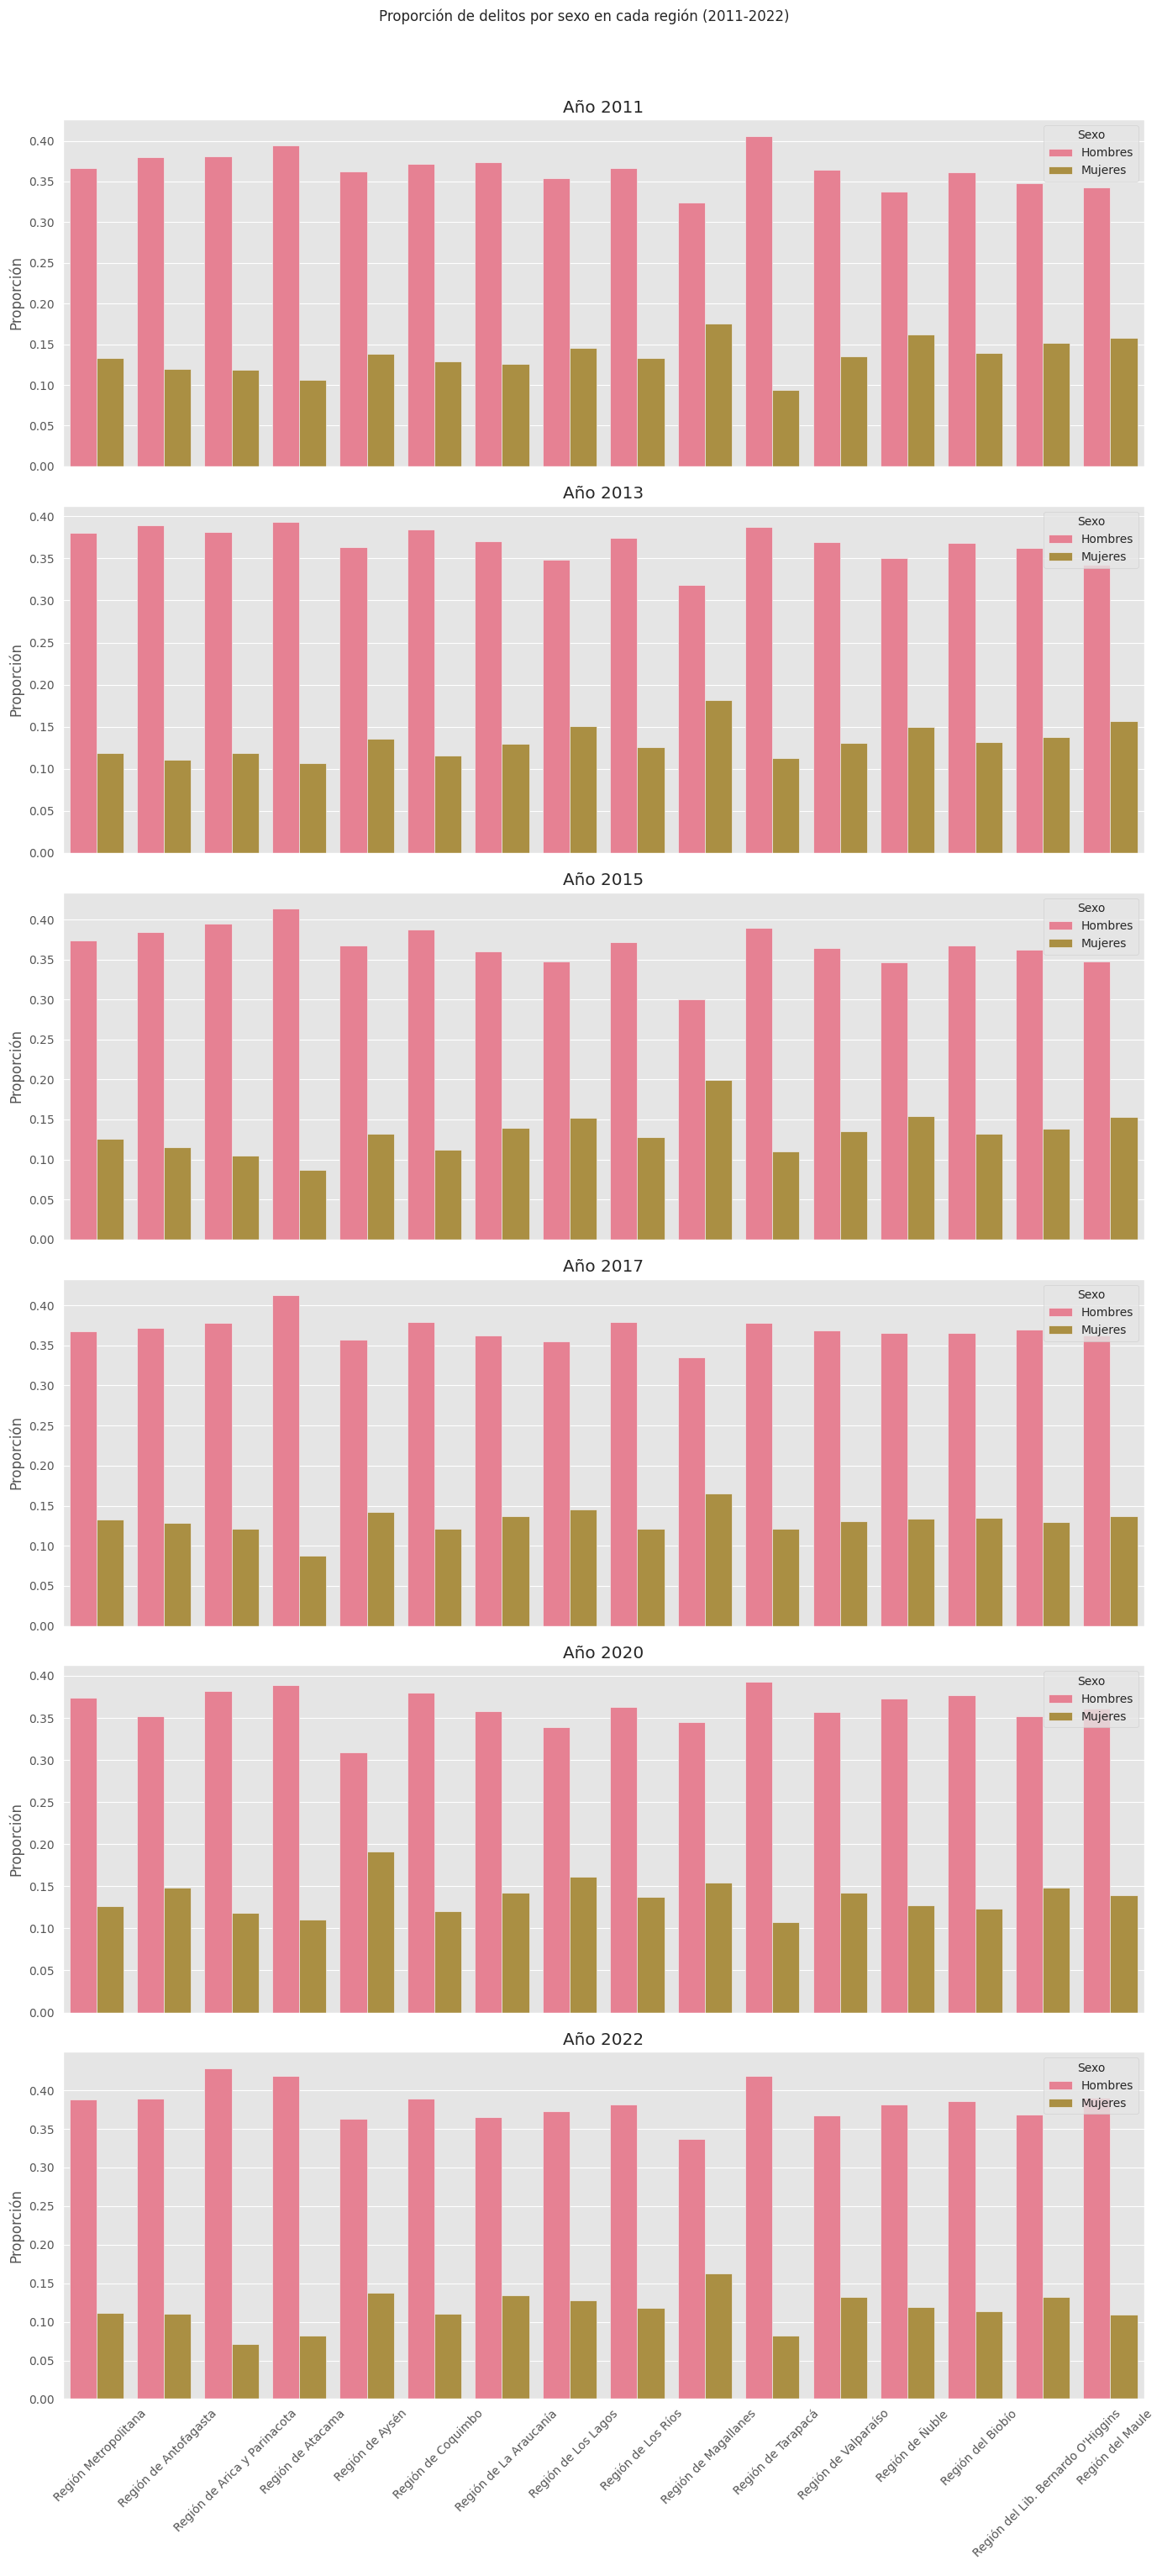


Resumen comparativo de R²:
4D: 0.372
5D: 0.420
Junto: 0.380


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# === Cargar todas las hojas necesarias desde el archivo Excel ===
xls = pd.ExcelFile(data)
df_4d = pd.read_excel(xls, sheet_name='4 dimensiones')     # Datos con pobreza 4D
df_5d = pd.read_excel(xls, sheet_name='5 dimensiones')     # Datos con pobreza 5D
df_junto = pd.read_excel(xls, sheet_name='junto')          # Datos con dimensiones combinadas

# === Cargar hoja 'region sexo edad' y renombrar columnas de años ===
# Los años están desde la columna 5 en adelante, por eso se renombran manualmente
year_cols = [2011, 2013, 2015, 2017, 2020, 2022]
df_sexo_edad = pd.read_excel(xls, sheet_name='region sexo edad', header=0)
current_cols = df_sexo_edad.columns.tolist()
rename_dict = {current_cols[i]: year_cols[i-4] for i in range(4, len(current_cols))}
df_sexo_edad = df_sexo_edad.rename(columns=rename_dict)

# === Convertir a formato largo (long) para que cada fila sea una observación por año ===
df_long = df_sexo_edad.melt(id_vars=['Region', 'Tipo Participante', 'Sexo', 'Edad'],
                            var_name='año', value_name='n_crimenes')
df_long['año'] = pd.to_numeric(df_long['año'], errors='coerce')  # Convertir año a número

# === Filtrar solo datos de victimarios ===
df_autores = df_long[df_long['Tipo Participante'].str.strip().str.lower() == 'victimario'].dropna(subset=['año'])

# === Calcular totales por Región y año ===
total = df_autores.groupby(['Region', 'año'])['n_crimenes'].sum().reset_index(name='total_autores')

# === Filtrar por sexo ===
hombres = df_autores[df_autores['Sexo'].str.strip().str.lower() == 'hombre']
mujeres = df_autores[df_autores['Sexo'].str.strip().str.lower() == 'mujer']

# === Calcular número de crímenes por sexo, región y año ===
hombres_total = hombres.groupby(['Region', 'año'])['n_crimenes'].sum().reset_index(name='crimenes_hombres')
mujeres_total = mujeres.groupby(['Region', 'año'])['n_crimenes'].sum().reset_index(name='crimenes_mujeres')

# === Unir totales y calcular proporciones por sexo ===
df_sexo_prop = total.merge(hombres_total, on=['Region', 'año'], how='left') \
                    .merge(mujeres_total, on=['Region', 'año'], how='left')

df_sexo_prop[['crimenes_hombres', 'crimenes_mujeres']] = df_sexo_prop[['crimenes_hombres', 'crimenes_mujeres']].fillna(0)

# Proporción de crímenes por hombres y mujeres
df_sexo_prop['prop_hombres'] = df_sexo_prop['crimenes_hombres'] / df_sexo_prop['total_autores'].replace(0, pd.NA)
df_sexo_prop['prop_mujeres'] = df_sexo_prop['crimenes_mujeres'] / df_sexo_prop['total_autores'].replace(0, pd.NA)

df_sexo_prop = df_sexo_prop.dropna(subset=['prop_hombres', 'prop_mujeres'])

# === Estandarizar nombres en los tres datasets principales ===
df_4d = df_4d.rename(columns={
    'Tasa delitos 100.000 habitantes': 'tasa_delitos',
    'Pobreza multidimensional 4': 'pobreza',
    'Tasa de desocupacion %': 'desempleo'
})
df_5d = df_5d.rename(columns={
    'Tasa delitos 100.000 habitantes': 'tasa_delitos',
    'Pobreza multidimensional 5': 'pobreza',
    'Tasa de desocupacion %': 'desempleo'
})
df_junto = df_junto.rename(columns={
    'Tasa delitos 100.000 habitantes': 'tasa_delitos',
    'Pobreza multidimensional': 'pobreza',
    'Tasa de desocupacion %': 'desempleo'
})

# === Función para unir datos con proporciones y correr regresión OLS ===
def merge_variables(df, nombre):
    # Asegurar que la columna 'año' esté presente y en formato correcto
    if 'año' not in df.columns:
         if 'Año' in df.columns:
             df = df.rename(columns={'Año': 'año'})
         else:
             print(f"Warning: 'año' column not found in {nombre} dataframe.")
             return None, None

    df['año'] = pd.to_numeric(df['año'], errors='coerce')
    df = df.dropna(subset=['año'])
    df['año'] = df['año'].astype(int)

    # Unir con proporciones de hombres y mujeres
    df_merged = pd.merge(df, df_sexo_prop[['Region', 'año', 'prop_hombres', 'prop_mujeres']],
                         on=['Region', 'año'], how='left')

    # Eliminar filas con datos faltantes
    df_cleaned = df_merged.dropna(subset=['pobreza', 'tasa_delitos', 'desempleo', 'prop_hombres', 'prop_mujeres'])

    if df_cleaned.empty:
        print(f"Warning: No complete cases left for regression in {nombre} after dropping NaNs.")
        return df_cleaned, None

    # Definir X (predictores) e y (objetivo), y ajustar modelo
    X = df_cleaned[['pobreza', 'desempleo', 'prop_hombres', 'prop_mujeres']]
    X = sm.add_constant(X)
    y = df_cleaned['tasa_delitos']

    modelo = sm.OLS(y, X).fit()
    print(f"\n--- Regresión: {nombre} ---")
    print(modelo.summary())
    return df_cleaned, modelo

# === Ejecutar regresión para los tres datasets ===
df_4d_clean, modelo4 = merge_variables(df_4d.copy(), "4 dimensiones")
df_5d_clean, modelo5 = merge_variables(df_5d.copy(), "5 dimensiones")
df_junto_clean, modelo_junto = merge_variables(df_junto.copy(), "dimensiones juntas")

# === Gráfico de proporciones por sexo y región por año (gráfico de barras) ===
# Aquí se crea una subfigura por año, con una barra por región desglosada por sexo
# Crear df_barra_long a partir de df_sexo_prop para graficar
df_barra_long = pd.melt(
    df_sexo_prop,
    id_vars=['Region', 'año'],
    value_vars=['prop_hombres', 'prop_mujeres'],
    var_name='Sexo',
    value_name='Proporcion'
)

# Renombrar valores de la columna 'Sexo' para mejor presentación en el gráfico
df_barra_long['Sexo'] = df_barra_long['Sexo'].map({
    'prop_hombres': 'Hombres',
    'prop_mujeres': 'Mujeres'
})

años = df_barra_long['año'].unique()
n_años = len(años)

fig, axes = plt.subplots(n_años, 1, figsize=(14, 5 * n_años), sharex=True)

for i, año in enumerate(años):
    df_año = df_barra_long[df_barra_long['año'] == año]

    sns.barplot(data=df_año,
                x='Region', y='Proporcion', hue='Sexo',
                ax=axes[i])

    axes[i].set_title(f'Año {año}')
    axes[i].set_ylabel('Proporción')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Sexo')

plt.suptitle('Proporción de delitos por sexo en cada región (2011-2022)', y=1.02)
plt.tight_layout()
plt.show()

# === Imprimir R² de cada modelo para comparar rendimiento explicativo ===
print("\nResumen comparativo de R²:")
if modelo4: print(f"4D: {modelo4.rsquared:.3f}")
if modelo5: print(f"5D: {modelo5.rsquared:.3f}")
if modelo_junto: print(f"Junto: {modelo_junto.rsquared:.3f}")


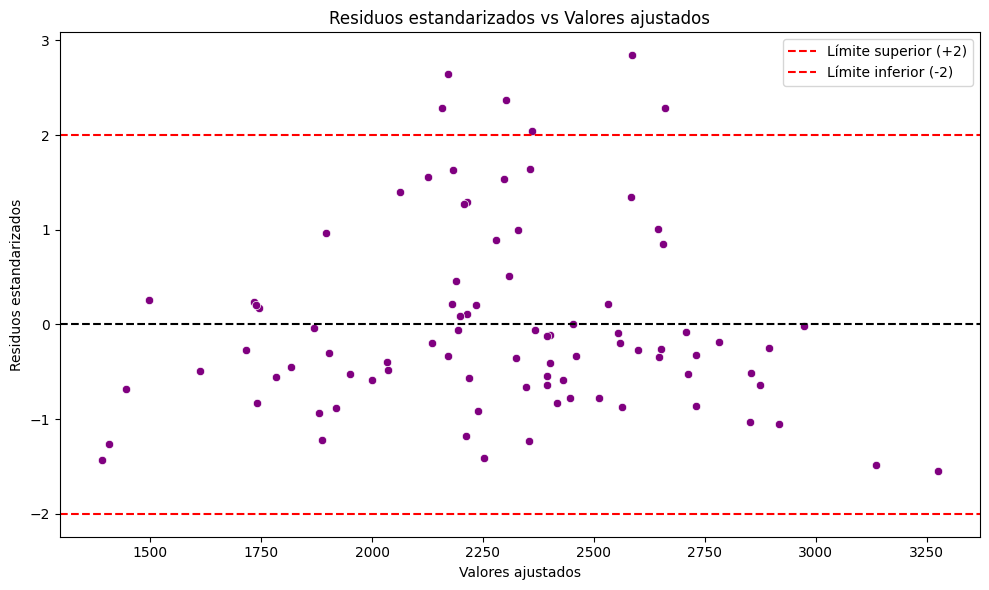

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde la hoja "junto" del archivo Excel
df = pd.read_excel(data, sheet_name='junto')

# Renombrar columnas para facilitar su uso y mantener consistencia con otros análisis
df = df.rename(columns={
    'Tasa delitos 100.000 habitantes': 'tasa_delitos',
    'Pobreza multidimensional': 'pobreza',
    'Tasa de desocupacion %': 'desempleo'
})

# Eliminar filas que tengan valores faltantes en las variables clave
df = df.dropna(subset=['tasa_delitos', 'pobreza', 'desempleo'])

# === Definición de variables ===
# Variables independientes: pobreza y desempleo (más la constante)
X = df[['pobreza', 'desempleo']]
X = sm.add_constant(X)  # Agrega columna de 1s para el intercepto
y = df['tasa_delitos']  # Variable dependiente

# === Ajustar modelo de regresión lineal OLS ===
modelo = sm.OLS(y, X).fit()

# === Obtener residuos estandarizados y valores ajustados ===
influence = modelo.get_influence()  # Obtener información de influencia del modelo
residuos_estandarizados = influence.resid_studentized_internal  # Residuos internos estandarizados
valores_ajustados = modelo.fittedvalues  # Valores predichos por el modelo

# === Gráfico de diagnóstico ===
# Permite identificar observaciones atípicas y evaluar si hay patrones no explicados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=valores_ajustados, y=residuos_estandarizados, color='purple')  # Dispersión

# Líneas horizontales para facilitar la interpretación de outliers
plt.axhline(y=0, color='black', linestyle='--')  # Línea base en 0
plt.axhline(y=2, color='red', linestyle='--', label='Límite superior (+2)')
plt.axhline(y=-2, color='red', linestyle='--', label='Límite inferior (-2)')

# Etiquetas del gráfico
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos estandarizados')
plt.title('Residuos estandarizados vs Valores ajustados')
plt.legend()
plt.tight_layout()
plt.show()

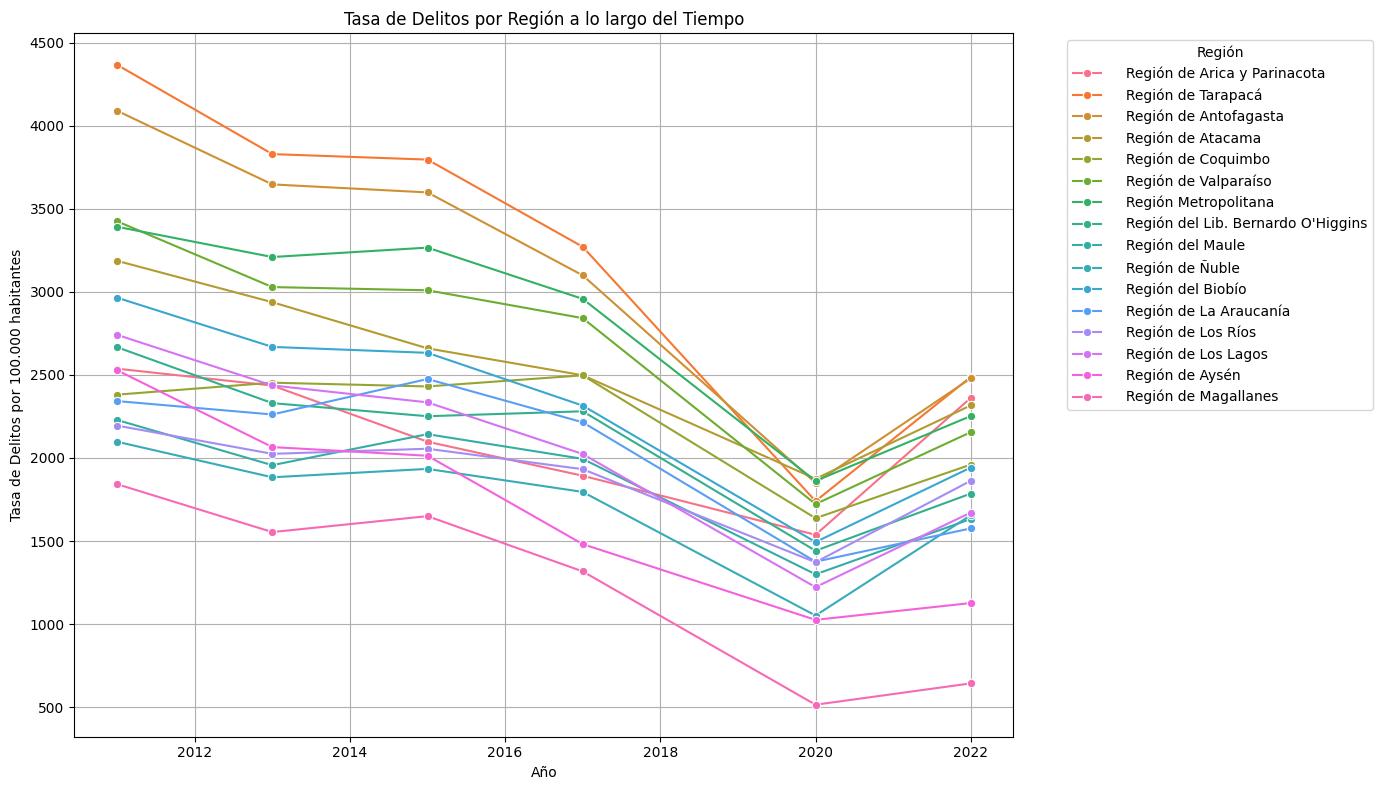

/tmp/ipython-input-7-3674693317.py:35: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.lineplot(


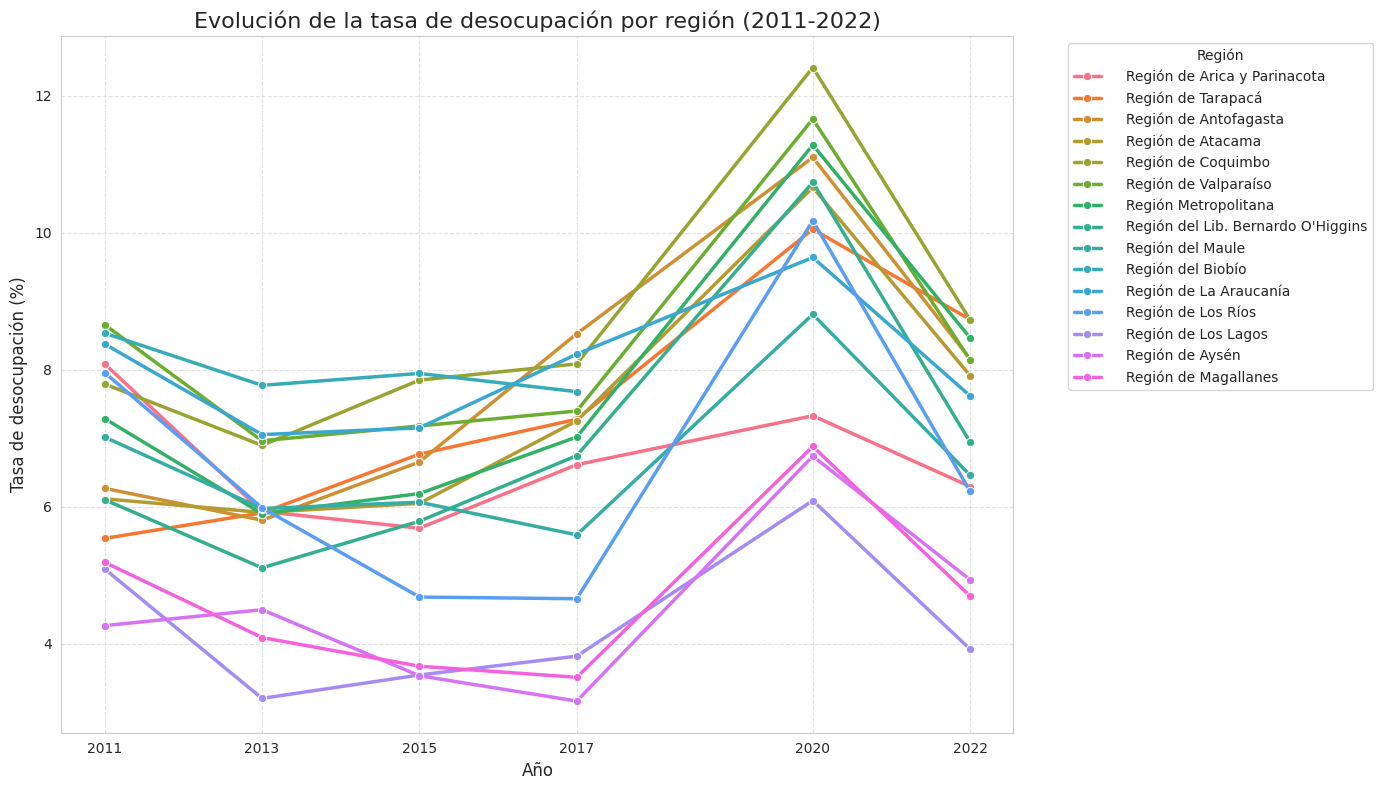

In [ ]:
# Importación de librerías necesarias para análisis de datos y visualización
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos desde la hoja "junto" del archivo Excel (la variable 'data' debe contener el archivo)
df_junto = pd.read_excel(data, sheet_name="junto")

# Renombrar columnas para que sean más fáciles de usar y coherentes con otros scripts
df_junto = df_junto.rename(columns={
    'Tasa delitos 100.000 habitantes': 'tasa_delitos',
    'Tasa de desocupacion %': 'desempleo',
    'Pobreza multidimensional': 'pobreza'
})

# === Gráfico de la tasa de delitos a lo largo del tiempo por región ===
plt.figure(figsize=(14, 8))  # Tamaño del gráfico
sns.lineplot(data=df_junto, x='año', y='tasa_delitos', hue='Region', marker='o')  # Gráfico de líneas
plt.title('Tasa de Delitos por Región a lo largo del Tiempo')  # Título del gráfico
plt.xlabel('Año')  # Etiqueta del eje X
plt.ylabel('Tasa de Delitos por 100.000 habitantes')  # Etiqueta del eje Y
plt.grid(True)  # Activar la grilla
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.tight_layout()  # Ajustar para evitar cortes
plt.show()  # Mostrar el gráfico

# === Gráfico de evolución de la tasa de desocupación por región ===
plt.figure(figsize=(14, 8))  # Tamaño del gráfico
sns.set_style("whitegrid")  # Estilo de fondo del gráfico

# Definir paleta de colores basada en la cantidad de regiones únicas
paleta = sns.color_palette("husl", n_colors=len(df_junto["Region"].unique()))

# Crear gráfico de líneas para la tasa de desempleo
sns.lineplot(
    data=df_junto.dropna(subset=["desempleo"]),  # Eliminar filas con NaN en desempleo
    x="año",
    y="desempleo",
    hue="Region",
    palette=paleta,
    marker="o",
    linewidth=2.5,
)

plt.title("Evolución de la tasa de desocupación por región (2011-2022)", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Tasa de desocupación (%)", fontsize=12)
plt.xticks(df_junto["año"].unique())  # Mostrar cada año en el eje X
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Región")  # Leyenda alineada fuera
plt.grid(True, linestyle="--", alpha=0.6)  # Grilla con estilo punteado
plt.tight_layout()
plt.show()


Index(['año', 'Region', 'tasa_delitos', 'desempleo', 'pobreza',
       'Tipo Participante', 'tasa_participacion', 'Sexo_HOMBRE', 'Sexo_MUJER',
       'Sexo_TOTAL', 'Edad_14 - 17 años', 'Edad_18 - 29 años',
       'Edad_30 - 44 años', 'Edad_45 - 64 años', 'Edad_65 años y más',
       'Edad_Menores de 14 años'],
      dtype='object')


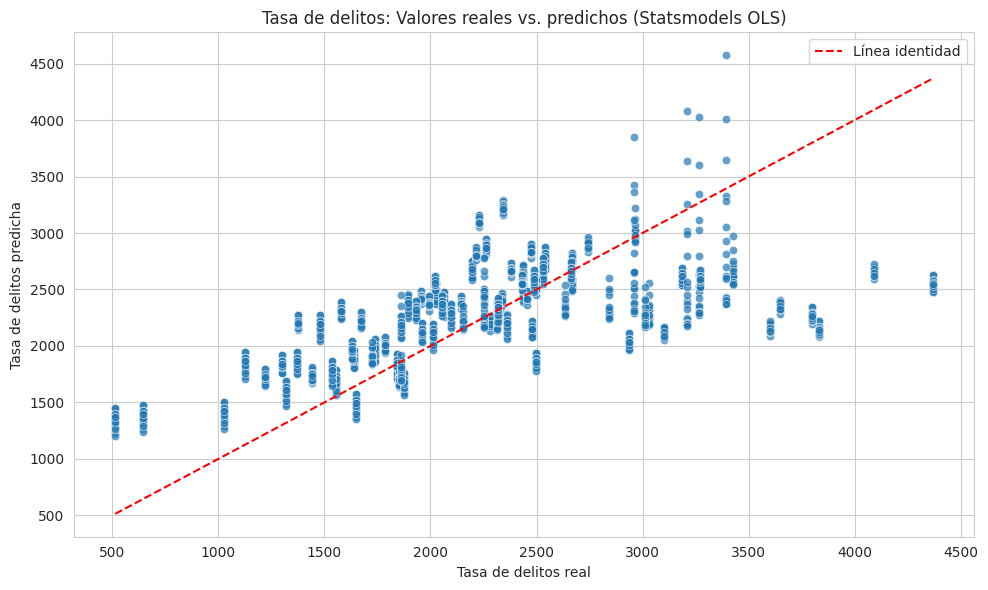


=== sklearn Linear Regression Evaluation ===
R²: 0.3638633247328603
RMSE: 598.8759162173839


In [ ]:
# Importación de librerías necesarias para análisis de datos, visualización y modelado
import pandas as pd
import numpy as np  # Para funciones numéricas como raíz cuadrada
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # Para regresión OLS con más detalle

# Cargar datos desde la hoja 'region sexo edad' del archivo Excel
df_edad = pd.read_excel(data, sheet_name='region sexo edad')

# Transformar de formato ancho a largo (para que cada fila represente un año específico)
df_long = df_edad.melt(
    id_vars=['Region', 'Tipo Participante', 'Sexo', 'Edad'],
    var_name='año',
    value_name='tasa_participacion'
)

# Convertir la columna 'año' a tipo numérico y eliminar filas no válidas
df_long['año'] = pd.to_numeric(df_long['año'], errors='coerce')
df_long = df_long.dropna(subset=['año'])
df_long['año'] = df_long['año'].astype(int)

# Filtrar solo los datos donde la persona fue "victimario" (cometió el delito)
df_vict = df_long[df_long['Tipo Participante'].str.lower().str.contains('victimario')]

# Eliminar filas con edad 'Total' o 'No identifica' para evitar ruido en el análisis
df_vict = df_vict[~df_vict['Edad'].isin(['Total', 'No identifica'])]

# Crear variables dummy (variables binarias) para las columnas categóricas 'Sexo' y 'Edad'
df_vict = pd.get_dummies(df_vict, columns=['Sexo', 'Edad'], drop_first=False)

# Cargar la hoja 'junto', que contiene variables como pobreza, desempleo y tasa de delitos
df_junto = pd.read_excel(data, sheet_name='junto')

# Renombrar columnas para que tengan nombres más manejables y consistentes
df_junto = df_junto.rename(columns={
    'Tasa delitos 100.000 habitantes': 'tasa_delitos',
    'Tasa de desocupacion %': 'desempleo',
    'Pobreza multidimensional': 'pobreza'
})

# Unir ambos DataFrames por región y año
df_merge = pd.merge(df_junto, df_vict, left_on=['Region', 'año'], right_on=['Region', 'año'], how='inner')

# Ver columnas disponibles luego de la fusión
print(df_merge.columns)

# Selección de variables predictoras (X), eliminando columnas irrelevantes
numeric_cols = df_merge.select_dtypes(include=np.number).columns.tolist()
cols_to_drop = ['Region', 'año', 'tasa_delitos']
X = df_merge[numeric_cols].drop(columns=cols_to_drop, errors='ignore')

# Agregar columnas dummy (booleanas) a las variables predictoras
dummy_cols = df_merge.select_dtypes(include='bool').columns.tolist()
X_dummies = df_merge[dummy_cols].astype(int)
X = pd.concat([X, X_dummies], axis=1)

# Variable objetivo: tasa de delitos
y = df_merge['tasa_delitos']

# Eliminar filas con valores faltantes antes de entrenar modelos
df_model = pd.concat([X, y], axis=1).dropna()
X = df_model.drop(columns=['tasa_delitos'])
y = df_model['tasa_delitos']

# === Regresión lineal con statsmodels (para obtener coeficientes y evaluar visualmente) ===
X_ols = sm.add_constant(X)  # Agrega el término constante (intercepto)
modelo_ols = sm.OLS(y, X_ols).fit()

# Obtener predicciones del modelo OLS
y_pred_ols = modelo_ols.predict(X_ols)
y_true = y

# Crear DataFrame para graficar valores reales vs predichos
df_resultado = pd.DataFrame({'Real': y_true, 'Predicho': y_pred_ols})

# Gráfico de dispersión comparando lo real con lo predicho
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_resultado, x='Real', y='Predicho', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Línea identidad')
plt.title('Tasa de delitos: Valores reales vs. predichos (Statsmodels OLS)')
plt.xlabel('Tasa de delitos real')
plt.ylabel('Tasa de delitos predicha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Regresión lineal con sklearn (enfoque más directo y evaluado con R² y RMSE) ===
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo_sk = LinearRegression()
modelo_sk.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_sk = modelo_sk.predict(X_test)
print("\n=== sklearn Linear Regression Evaluation ===")
print("R²:", r2_score(y_test, y_pred_sk))  # Qué tan bien se ajusta el modelo
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sk)))  # Error cuadrático medio raíz


=== ANÁLISIS EXPLORATORIO COMPLETO ===


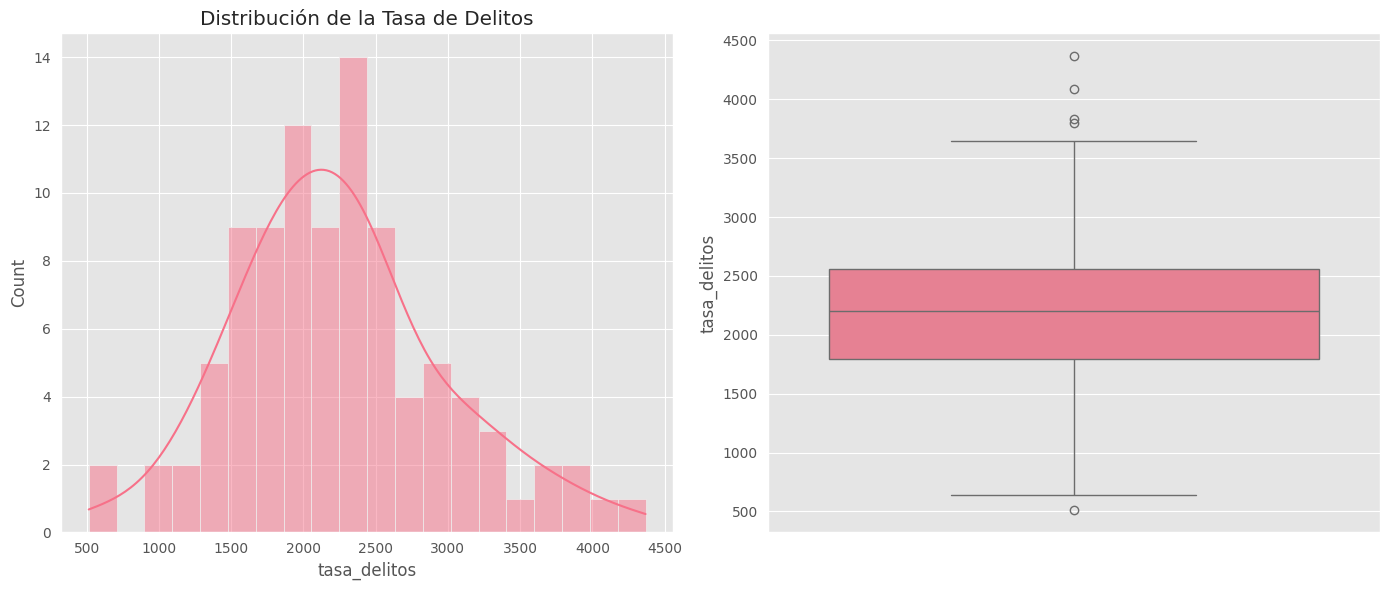

/tmp/ipython-input-9-3055057679.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Año', y='tasa_delitos', hue='Region', ci=None)


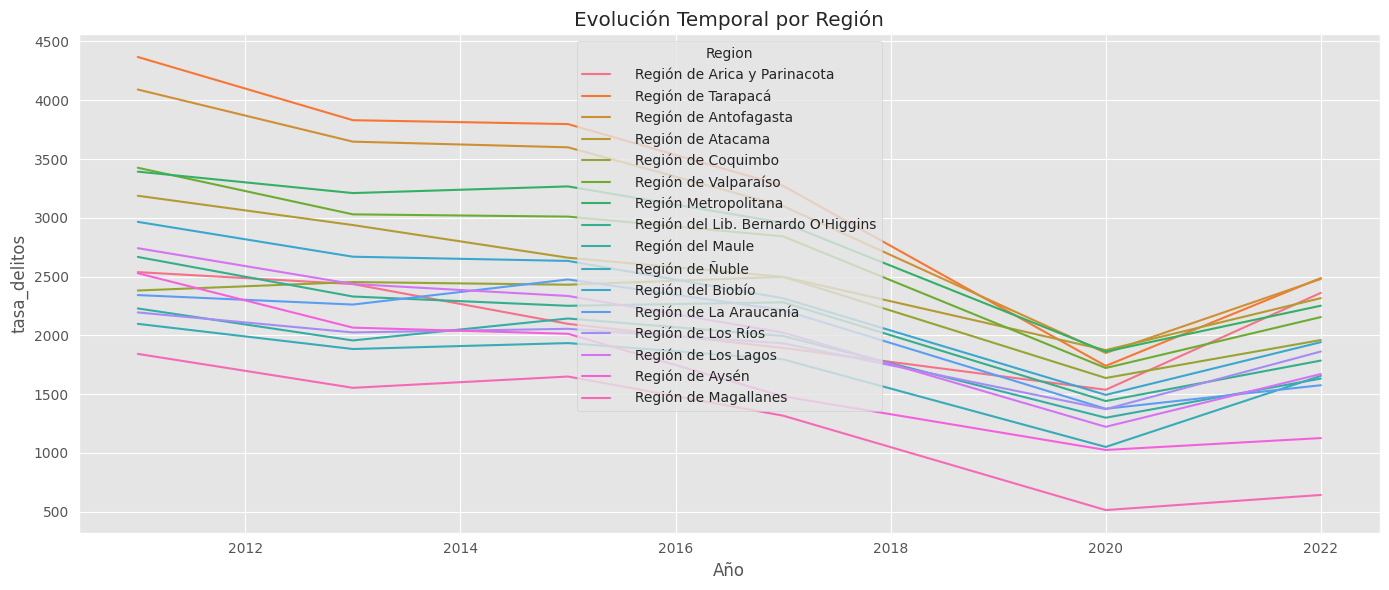

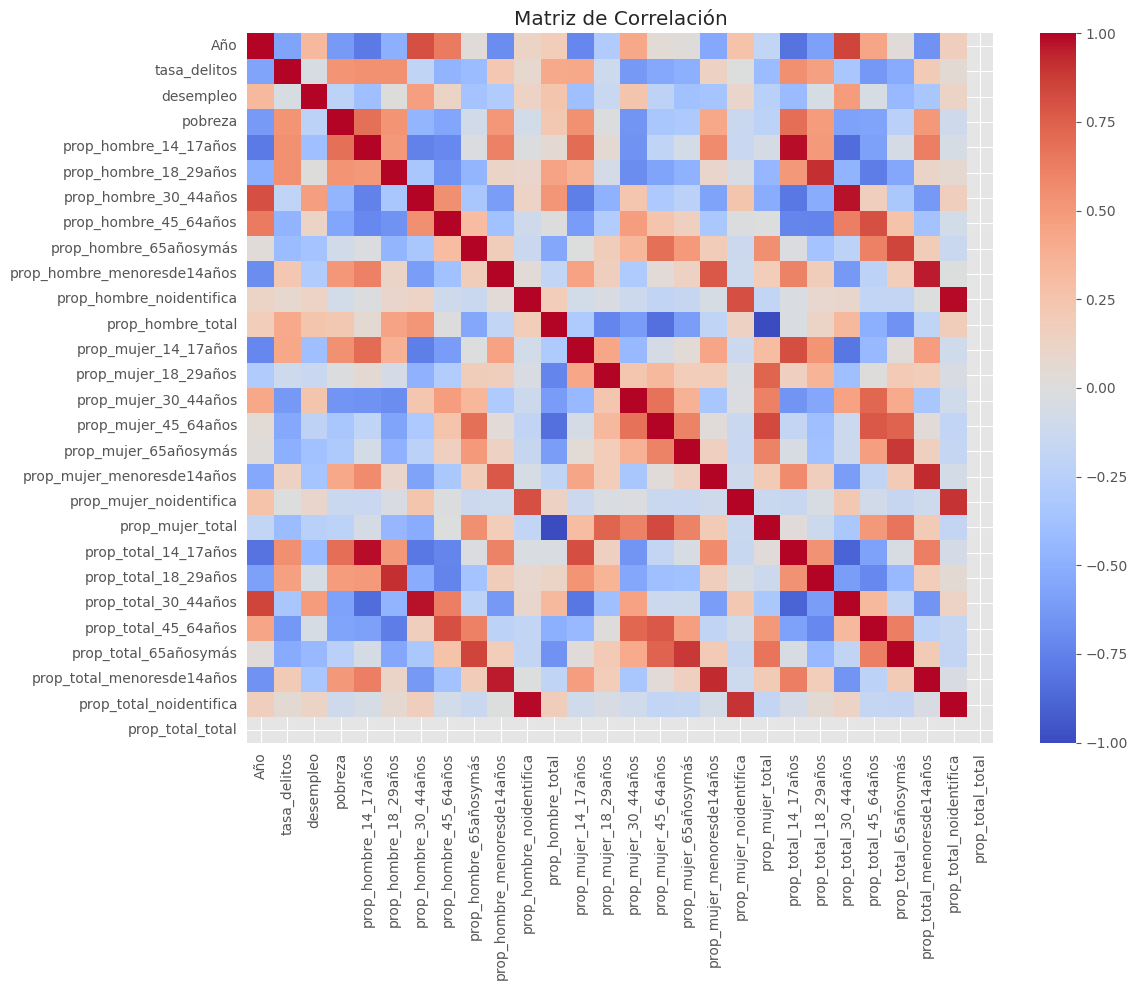


Variables predictoras:
['desempleo', 'pobreza', 'prop_hombre_14_17años', 'prop_hombre_18_29años', 'prop_hombre_30_44años', 'prop_hombre_45_64años', 'prop_hombre_65añosymás', 'prop_hombre_menoresde14años', 'prop_hombre_noidentifica', 'prop_hombre_total', 'prop_mujer_14_17años', 'prop_mujer_18_29años', 'prop_mujer_30_44años', 'prop_mujer_45_64años', 'prop_mujer_65añosymás', 'prop_mujer_menoresde14años', 'prop_mujer_noidentifica', 'prop_mujer_total', 'prop_total_14_17años', 'prop_total_18_29años', 'prop_total_30_44años', 'prop_total_45_64años', 'prop_total_65añosymás', 'prop_total_menoresde14años', 'prop_total_noidentifica', 'prop_total_total']

=== MODELO RANDOM FOREST ===
Random Forest - R²: 0.721
Random Forest - RMSE: 451.294
Random Forest - MAE: 362.618


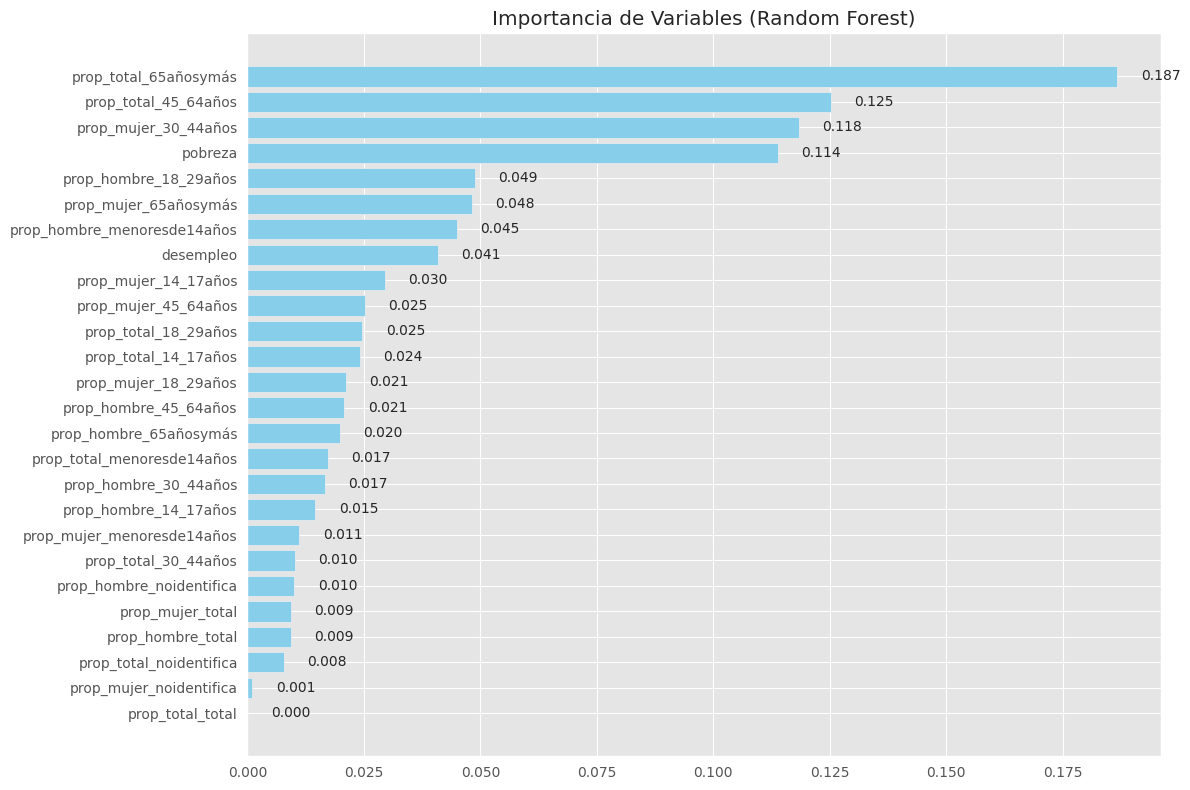

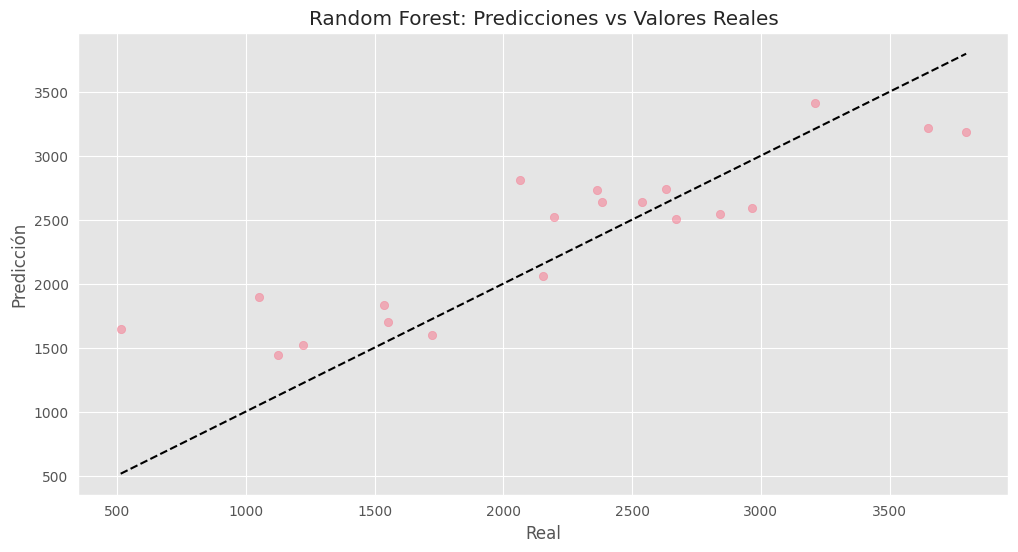


=== MODELO LASSO ===
Lasso - R²: 0.665
Lasso - RMSE: 494.606
Lasso - MAE: 362.905


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.732e+06, tolerance: 3.580e+03
  model = cd_fast.enet_coordinate_descent(


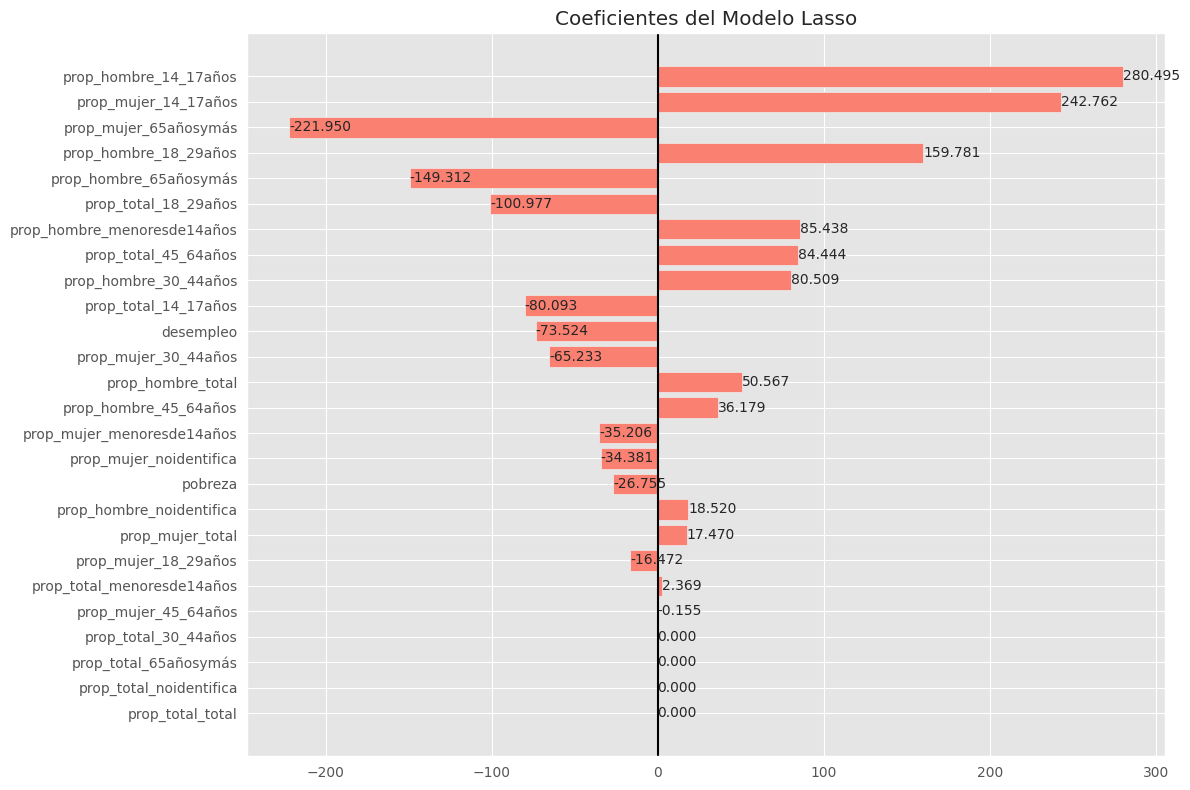


Top 10 variables más importantes (Random Forest):
                       Variable  Importancia
22        prop_total_65añosymás     0.186769
21         prop_total_45_64años     0.125254
12         prop_mujer_30_44años     0.118376
1                       pobreza     0.113826
3         prop_hombre_18_29años     0.048765
14        prop_mujer_65añosymás     0.048256
7   prop_hombre_menoresde14años     0.045019
0                     desempleo     0.040799
10         prop_mujer_14_17años     0.029537
13         prop_mujer_45_64años     0.025238


In [ ]:
# Importaciones necesarias para análisis, modelos de regresión, visualización y manipulación de datos
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de los gráficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# === 1. Cargar y preparar los datos desde Excel ===
# Se carga el archivo de Excel (variable 'data' debe estar definida con la ruta)
xls = pd.ExcelFile(data)

# --- Cargar hojas específicas desde el archivo Excel
df_junto = xls.parse("junto")
df_sexo_edad = xls.parse("region sexo edad")

# --- Transformar datos de la hoja "region sexo edad" para analizar delitos por sexo y edad
df_long = df_sexo_edad.melt(
    id_vars=["Region", "Tipo Participante", "Sexo", "Edad"],
    var_name="Año",
    value_name="delitos"
)
df_long["Año"] = df_long["Año"].astype(int)

# Filtramos solo los casos en que la persona fue victimaria (quien cometió el delito)
df_long = df_long[df_long["Tipo Participante"] == "VICTIMARIO"]

# Agrupamos por región y año para obtener total de delitos
total_por_region_ano = df_long.groupby(["Region", "Año"])["delitos"].sum().reset_index()
total_por_region_ano = total_por_region_ano.rename(columns={"delitos": "total_delitos_region_ano"})

# Se calcula la proporción de delitos por grupo (sexo/edad) respecto al total de delitos en esa región y año
df_long = df_long.merge(total_por_region_ano, on=["Region", "Año"], how="left")
df_long["proporcion_delitos"] = df_long["delitos"] / df_long["total_delitos_region_ano"].replace(0, np.nan)

# Pivotear para tener una columna por grupo sexo/edad con su proporción
df_pivot = df_long.pivot_table(
    index=["Region", "Año"],
    columns=["Sexo", "Edad"],
    values="proporcion_delitos",
    fill_value=0
)
# Renombrar columnas con un formato más limpio
df_pivot.columns = [f"prop_{sexo.lower()}_{edad.lower().replace(' ', '').replace('-', '_').replace('ó', 'o')}"
                    for sexo, edad in df_pivot.columns]
df_pivot = df_pivot.reset_index()

# --- Limpiar nombres de columnas del DataFrame principal y unir con las proporciones creadas
df_junto = df_junto.rename(columns={
    "año": "Año",
    "Tasa delitos 100.000 habitantes": "tasa_delitos",
    "Tasa de desocupacion %": "desempleo",
    "Pobreza multidimensional": "pobreza"
})
df_final = df_junto.merge(df_pivot, on=["Region", "Año"], how="left")

# === 2. Exploración ===
# Función para hacer un análisis gráfico exploratorio de la variable objetivo 'tasa_delitos'
def exploracion_completa(df):
    print("\n=== ANÁLISIS EXPLORATORIO COMPLETO ===")

    # Histograma y boxplot de la tasa de delitos
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df['tasa_delitos'], kde=True, bins=20)
    plt.title('Distribución de la Tasa de Delitos')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['tasa_delitos'])
    plt.tight_layout()
    plt.show()

    # Gráfico de líneas por región a lo largo del tiempo
    if 'Año' in df.columns:
        plt.figure(figsize=(14, 6))
        sns.lineplot(data=df, x='Año', y='tasa_delitos', hue='Region', ci=None)
        plt.title('Evolución Temporal por Región')
        plt.tight_layout()
        plt.show()

    # Mapa de calor con correlaciones entre variables numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(12, 10))
        sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
        plt.title('Matriz de Correlación')
        plt.tight_layout()
        plt.show()

# === 3. Preparar datos ===
# Se separa la variable objetivo (tasa de delitos) del resto de predictores
def preparar_datos(df):
    df = df.copy()
    X = df.drop(columns=['tasa_delitos', 'Region', 'Año'])  # Variables predictoras
    y = df['tasa_delitos']  # Variable objetivo
    return X, y

# === 4. Modelado y evaluación ===
# Función principal de modelado que entrena y evalúa dos modelos: Random Forest y Lasso
def modelar_y_evaluar(X, y):
    # Identificar columnas numéricas y booleanas
    numeric_cols = X.select_dtypes(include=np.number).columns
    boolean_cols = X.select_dtypes(include=bool).columns

    # Imputación de valores faltantes con la media
    imputer = SimpleImputer(strategy='mean')
    X_numeric = pd.DataFrame(imputer.fit_transform(X[numeric_cols]), columns=numeric_cols, index=X.index)
    X_boolean = X[boolean_cols].astype(int)
    X_processed = pd.concat([X_numeric, X_boolean], axis=1)

    # Separar datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # --- Entrenamiento de Random Forest
    print("\n=== MODELO RANDOM FOREST ===")
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    # Evaluación del modelo y visualización
    evaluar_modelo(y_test, y_pred_rf, "Random Forest")
    importancias = analizar_importancia(rf_model, X_processed)
    plot_pred_vs_real(y_test, y_pred_rf, "Random Forest")

    # --- Entrenamiento de Lasso
    print("\n=== MODELO LASSO ===")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lasso = Lasso(alpha=0.05, random_state=42)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)

    # Evaluación del modelo Lasso
    evaluar_modelo(y_test, y_pred_lasso, "Lasso")
    plot_coeficientes_lasso(lasso, X_processed.columns)

    return rf_model, lasso, importancias

# Función para imprimir métricas de evaluación del modelo
def evaluar_modelo(y_test, y_pred, model_name):
    print(f"{model_name} - R²: {r2_score(y_test, y_pred):.3f}")
    print(f"{model_name} - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
    print(f"{model_name} - MAE: {mean_absolute_error(y_test, y_pred):.3f}")

# Gráfico de predicción vs valor real
def plot_pred_vs_real(y_test, y_pred, model_name):
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.title(f'{model_name}: Predicciones vs Valores Reales')
    plt.xlabel("Real")
    plt.ylabel("Predicción")
    plt.grid(True)
    plt.show()

# Visualización de la importancia de variables en Random Forest
def analizar_importancia(model, X):
    importancias = model.feature_importances_
    df_imp = pd.DataFrame({'Variable': X.columns, 'Importancia': importancias}).sort_values(by='Importancia', ascending=False)

    plt.figure(figsize=(12, 8))
    bars = plt.barh(df_imp['Variable'], df_imp['Importancia'], color='skyblue')
    for bar in bars:
        plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center')
    plt.title("Importancia de Variables (Random Forest)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    return df_imp

# Visualización de los coeficientes obtenidos por el modelo Lasso
def plot_coeficientes_lasso(model, feature_names):
    coefs = pd.DataFrame({'Variable': feature_names, 'Coeficiente': model.coef_}).sort_values(by='Coeficiente', key=abs, ascending=False)
    plt.figure(figsize=(12, 8))
    bars = plt.barh(coefs['Variable'], coefs['Coeficiente'], color='salmon')
    for bar in bars:
        plt.text(bar.get_width() + 0.005 if bar.get_width() > 0 else bar.get_width() - 0.05,
                 bar.get_y() + bar.get_height()/2,
                 f"{bar.get_width():.3f}", va='center')
    plt.axvline(0, color='black')
    plt.title("Coeficientes del Modelo Lasso")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# === 5. Ejecución ===
# Solo se ejecuta si el script está siendo ejecutado directamente
if __name__ == "__main__":
    # Validación para que no se ejecute si df_final está vacío
    if 'df_final' in locals() and not df_final.empty:
        exploracion_completa(df_final)
        X, y = preparar_datos(df_final)
        print("\nVariables predictoras:")
        print(X.columns.tolist())
        rf_model, lasso_model, importancias = modelar_y_evaluar(X, y)
        print("\nTop 10 variables más importantes (Random Forest):")
        print(importancias.head(10))
    else:
        print("El DataFrame df_final no está definido o está vacío. Asegúrate de ejecutar las celdas anteriores para cargar y preparar los datos.")
